In [1]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt 
import seaborn as sn                   # For plotting graphs
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

In [2]:
test = pd.read_csv(r"D:\project\test.csv")
train = pd.read_csv(r"D:\project\train.csv")

In [3]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [4]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [5]:
train.shape, test.shape

((31647, 18), (13564, 17))

In [6]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [7]:
train.head()

ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

In [8]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [9]:
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

<AxesSubplot:>

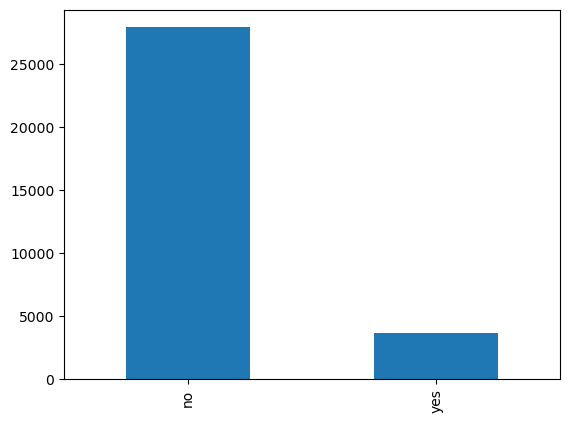

In [10]:
train['subscribed'].value_counts().plot.bar()

<AxesSubplot:xlabel='age', ylabel='Density'>

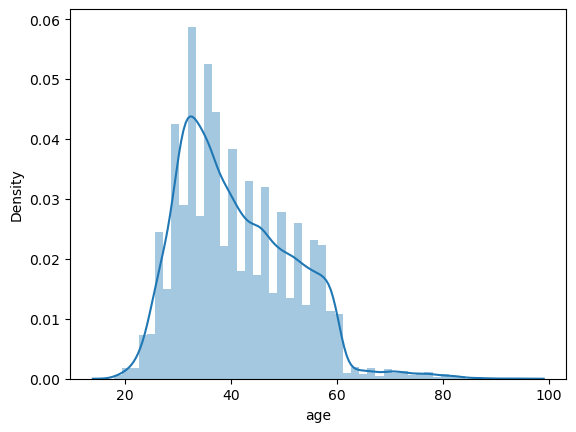

In [11]:
sn.distplot(train["age"])

<AxesSubplot:>

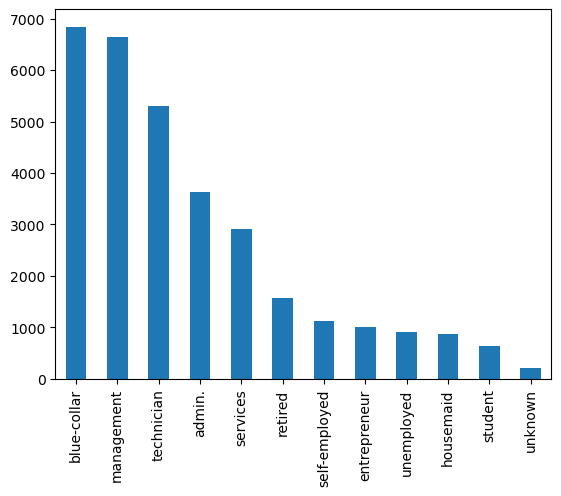

In [12]:
train['job'].value_counts().plot.bar()

<AxesSubplot:>

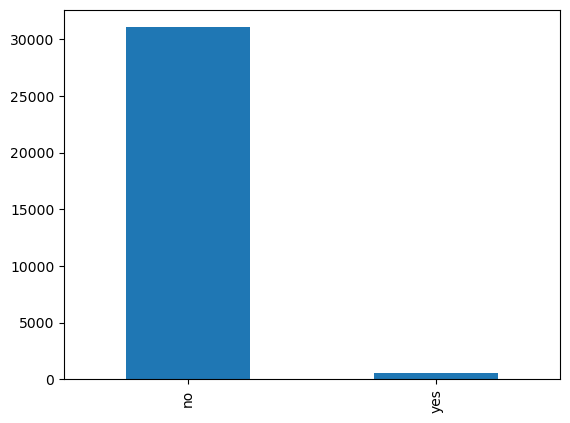

In [13]:
train['default'].value_counts().plot.bar()

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

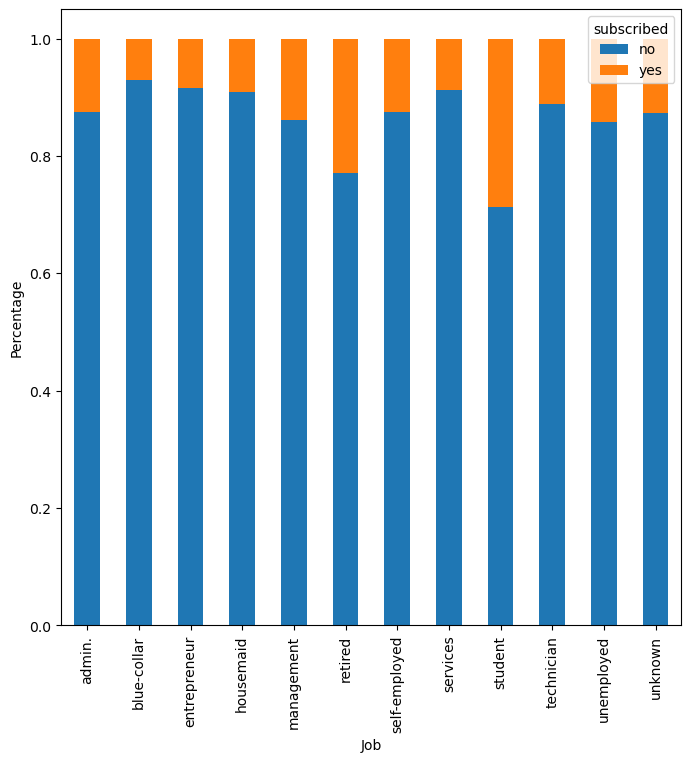

In [14]:
print(pd.crosstab(train['job'],train['subscribed']))
job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

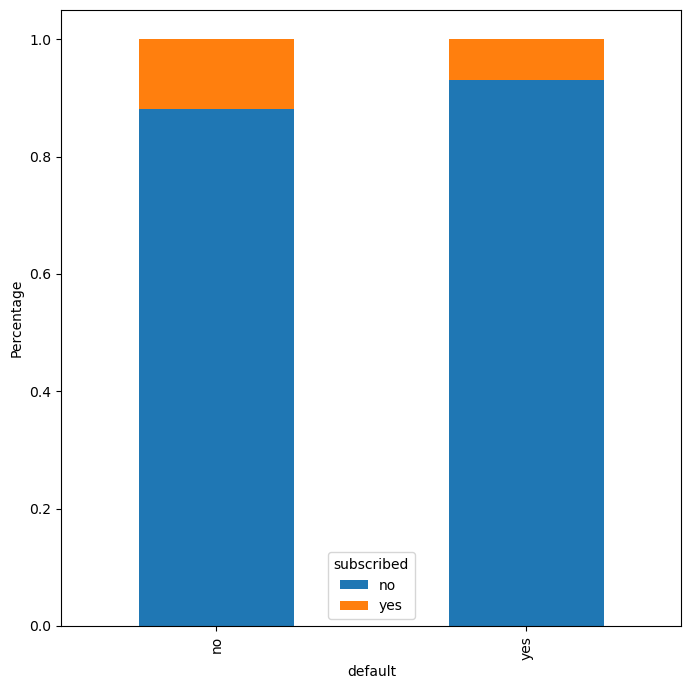

In [15]:
print(pd.crosstab(train['default'],train['subscribed']))
default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

In [16]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

<AxesSubplot:>

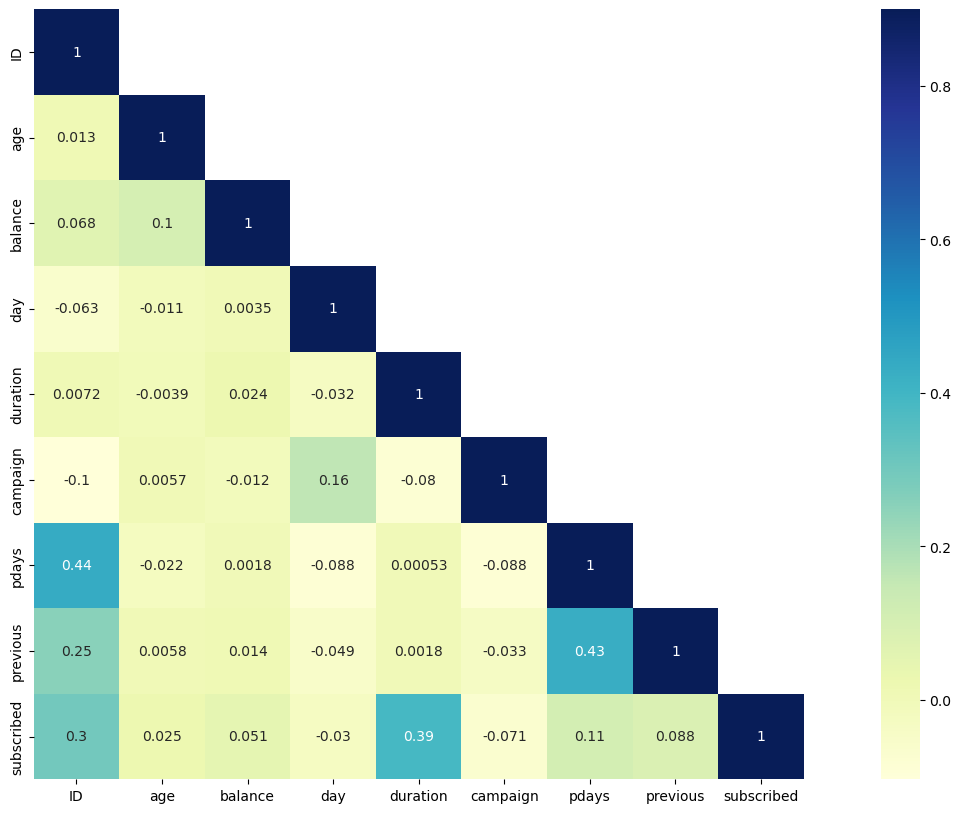

In [17]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [18]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [19]:
target = train['subscribed']
train = train.drop('subscribed',1)

In [20]:
train = pd.get_dummies(train)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [22]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lreg = LogisticRegression()

In [25]:
lreg.fit(X_train,y_train)

LogisticRegression()

In [26]:
prediction = lreg.predict(X_val)
print(classification_report(y_val,prediction))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5608
           1       0.52      0.20      0.29       722

    accuracy                           0.89      6330
   macro avg       0.71      0.59      0.61      6330
weighted avg       0.86      0.89      0.86      6330



In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_val, prediction)

0.8873617693522907

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
DC = DecisionTreeClassifier(max_depth=4, random_state=0)

In [31]:
DC.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [32]:
predict = DC.predict(X_val)

In [33]:
accuracy_score(y_val, predict)
from sklearn.metrics import classification_report
print(classification_report(y_val,predict))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5608
           1       0.59      0.55      0.57       722

    accuracy                           0.90      6330
   macro avg       0.76      0.75      0.76      6330
weighted avg       0.90      0.90      0.90      6330



In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
RFC = RandomForestClassifier(n_estimators=100, n_jobs=1)
RFC.fit(X_train, y_train)

RandomForestClassifier(n_jobs=1)

In [36]:
pred_rfc = RFC.predict(X_val)

In [37]:
RFC.score(X_val, predict)

0.9439178515007899

In [38]:
accuracy_score(y_val, pred_rfc)
print(classification_report(y_val,pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5608
           1       0.62      0.44      0.52       722

    accuracy                           0.91      6330
   macro avg       0.78      0.70      0.73      6330
weighted avg       0.90      0.91      0.90      6330



In [39]:
test = pd.get_dummies(test)

In [40]:
test_prediction = DC.predict(test)

In [41]:
submission = pd.DataFrame()

In [42]:
submission['ID'] = test['ID']
submission['subscribed'] = test_prediction

In [43]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [44]:
submission.to_csv('submission.csv', header=True, index=False)

In [45]:
for clf in (DC,RFC,lreg):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    print("Accuracy score of ",
        clf.__class__.__name__,"=",
        100*metrics.accuracy_score(y_train,y_pred))

Accuracy score of  DecisionTreeClassifier = 91.21933878421615
Accuracy score of  RandomForestClassifier = 100.0
Accuracy score of  LogisticRegression = 88.82174033258285
